In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter



In [27]:
# Load the dataset from JSON file
with open("BiztelAI_DS_Dataset_Mar'25.json", "r") as file:
    data = json.load(file)

In [28]:
# Convert JSON to DataFrame
processed_data = []
for chat_id, chat_info in data.items():
    article_url = chat_info.get("article_url", "Unknown")
    for message in chat_info.get("content", []):
        processed_data.append({
            "chat_id": chat_id,
            "article_url": article_url,
            "message": message["message"],
            "agent": message["agent"],
            "sentiment": message["sentiment"],
            "turn_rating": message.get("turn_rating", "Unknown")
        })

df = pd.DataFrame(processed_data)


In [29]:
# Display dataset overview
display(df.info())
display(df.describe())
display(df.head())

# Missing values analysis
missing_values = df.isnull().sum()
display(missing_values)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   chat_id      11760 non-null  object
 1   article_url  11760 non-null  object
 2   message      11760 non-null  object
 3   agent        11760 non-null  object
 4   sentiment    11760 non-null  object
 5   turn_rating  11760 non-null  object
dtypes: object(6)
memory usage: 551.4+ KB


None

,chat_id,article_url,message,agent,sentiment,turn_rating
count,11760,11760,11760,11760,11760,11760
unique,539,99,11595,2,8,6
top,t_b0f8601a-cd27-4492-bbfa-efbf0eea8c73,https://www.washingtonpost.com/local/for-tom-b...,"Hi there, do you watch the NFL?",agent_1,Curious to dive deeper,Excellent
freq,33,5032,17,6068,5542,6011


,chat_id,article_url,message,agent,sentiment,turn_rating
0,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,Did you know that the University of Iowa's loc...,agent_1,Curious to dive deeper,Good
1,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,I think I did hear something about that. I im...,agent_2,Neutral,Good
2,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,"So, it would be in the visiting team's locker ...",agent_1,Curious to dive deeper,Good
3,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,Right. Teams do all kinds of things to bother...,agent_2,Neutral,Good
4,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,"I would hate a cold bench. Then again, I would...",agent_1,Neutral,Good


chat_id        0
article_url    0
message        0
agent          0
sentiment      0
turn_rating    0
dtype: int64

In [33]:
# Agent-wise Summary with Sentiment Distribution
agent_summary = df.groupby("agent").agg(
    total_messages=pd.NamedAgg(column="message", aggfunc="count"),
    avg_turn_rating=pd.NamedAgg(column="turn_rating", aggfunc=lambda x: pd.to_numeric(x, errors='coerce').mean())
)
agent_sentiment_summary = df.groupby(["agent", "sentiment"]).size().unstack(fill_value=0)

# Merge summaries together
agent_summary = agent_summary.merge(agent_sentiment_summary, left_index=True, right_index=True)
display(agent_summary)

,total_messages,avg_turn_rating,Angry,Curious to dive deeper,Disgusted,Fearful,Happy,Neutral,Sad,Surprised
agent,,,,,,,,,,
agent_1,6068,NaN,25,3057,65,17,759,1443,48,654
agent_2,5692,NaN,38,2485,74,16,826,1399,73,781


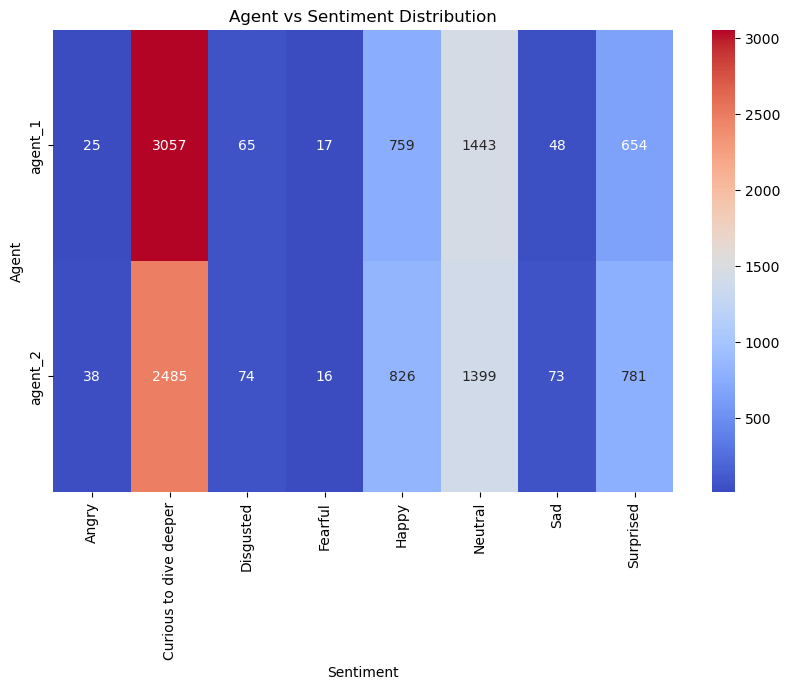

In [34]:
# Agent vs Sentiment Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(agent_sentiment_summary, annot=True, cmap='coolwarm', fmt='d')
plt.title("Agent vs Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Agent")
plt.show()


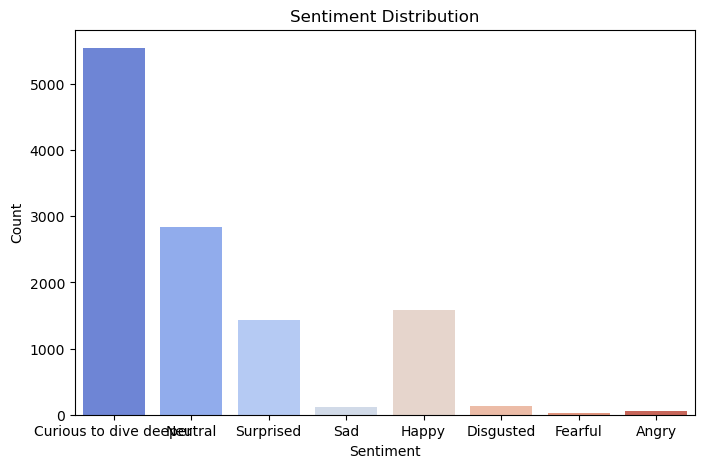

In [35]:
# Distribution of Sentiments
plt.figure(figsize=(8, 5))
sns.countplot(x=df['sentiment'], palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

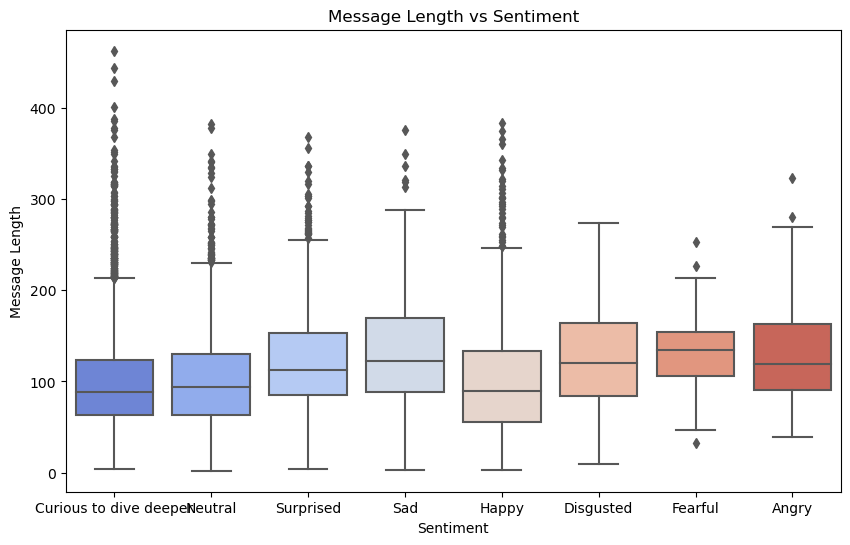

In [36]:
# Relationship between Message Length and Sentiment
df["message_length"] = df["message"].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sentiment'], y=df['message_length'], palette='coolwarm')
plt.title("Message Length vs Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Message Length")
plt.show()


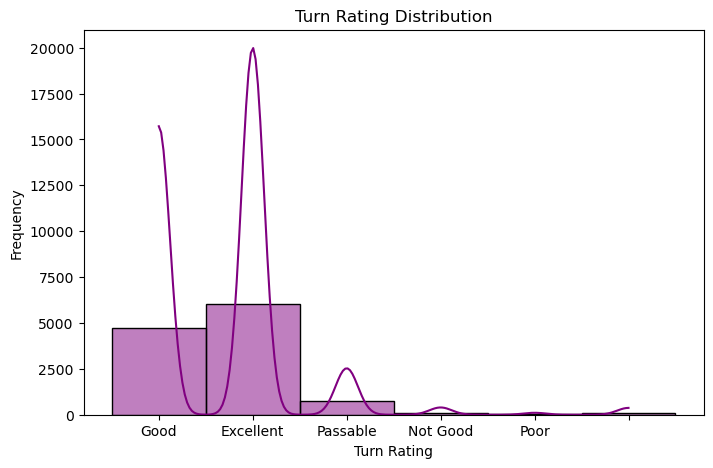

In [37]:
# Turn Rating Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['turn_rating'], bins=20, kde=True, color='purple')
plt.title("Turn Rating Distribution")
plt.xlabel("Turn Rating")
plt.ylabel("Frequency")
plt.show()
